In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaning.csv')

In [7]:
df.head(5)

,Date,Client,Estimate,Total,Paid,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,01/01/2014,Valando,"£2,252.00","£2,139.40",Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,0.95
1,01/02/2014,Livaca,"£2,512.00","£3,215.36",Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,1.28
2,01/06/2014,Skodour,"£2,551.00","£3,290.79",Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129,1.29
3,1/15/2014,Symteco,£905.00,£868.80,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,0.96
4,1/28/2014,Eco Blvd,£677.00,£636.38,Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,0.94


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         21 non-null     object 
 1   Client       21 non-null     object 
 2   Estimate     21 non-null     object 
 3   Total        21 non-null     object 
 4   Paid         21 non-null     object 
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  21 non-null     int64  
 16  Unnamed: 16  21 non-null     float64
dtypes: float64(11), int64(1), object(5)
memory usage: 2.9+ KB


In [17]:
df.isna().any()

Date           False
Client         False
Estimate       False
Total          False
Paid           False
Unnamed: 5      True
Unnamed: 6      True
Unnamed: 7      True
Unnamed: 8      True
Unnamed: 9      True
Unnamed: 10     True
Unnamed: 11     True
Unnamed: 12     True
Unnamed: 13     True
Unnamed: 14     True
Unnamed: 15    False
Unnamed: 16    False
dtype: bool

### Cleaning the data

In [5]:
# Dropping unnamed columns with no data

df_copy = df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis=1)

In [20]:
df_copy.head(5)

,Date,Client,Estimate,Total,Paid,Unnamed: 15,Unnamed: 16
0,01/01/2014,Valando,"£2,252.00","£2,139.40",Paid,95,0.95
1,01/02/2014,Livaca,"£2,512.00","£3,215.36",Paid,128,1.28
2,01/06/2014,Skodour,"£2,551.00","£3,290.79",Paid,129,1.29
3,1/15/2014,Symteco,£905.00,£868.80,Paid,96,0.96
4,1/28/2014,Eco Blvd,£677.00,£636.38,Paid,94,0.94


In [ ]:
# Removing the pound and commas from the estimate column

df_copy['Estimate'] = df_copy['Estimate'].str.replace('£', '').str.replace(',', '')

In [ ]:
# Removing the pound and commas from the total column

df_copy['Total'] = df_copy['Total'].str.replace('£', '').str.replace(',', '')

In [37]:
df_copy.head(5)

,Date,Client,Estimate,Total,Paid,Unnamed: 15,Unnamed: 16
0,01/01/2014,Valando,2252.00,2139.40,Paid,95,0.95
1,01/02/2014,Livaca,2512.00,3215.36,Paid,128,1.28
2,01/06/2014,Skodour,2551.00,3290.79,Paid,129,1.29
3,1/15/2014,Symteco,905.00,868.80,Paid,96,0.96
4,1/28/2014,Eco Blvd,677.00,636.38,Paid,94,0.94


In [ ]:
# Changing the datatype of the estimate column to float

df_copy['Estimate'] = df_copy['Estimate'].astype(float)

In [41]:
# Changing the datatype of the total column to float

df_copy['Total'] = df_copy['Total'].astype(float)

In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         21 non-null     object 
 1   Client       21 non-null     object 
 2   Estimate     21 non-null     float64
 3   Total        21 non-null     float64
 4   Paid         21 non-null     object 
 5   Unnamed: 15  21 non-null     int64  
 6   Unnamed: 16  21 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.3+ KB


##### Date column
The date column type is object, we need to change this to integer by splitting and extracting the day, month and year to different columns

In [ ]:
# Day column
df_copy['Day'] = df_copy['Date'].str.split('/').str[1].astype(int)

In [ ]:
# Month column
df_copy['Month'] = df_copy['Date'].str.split('/').str[0].astype(int)

In [ ]:
# Year column
df_copy['Year'] = df_copy['Date'].str.split('/').str[2].astype(int)

In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         21 non-null     object 
 1   Client       21 non-null     object 
 2   Estimate     21 non-null     float64
 3   Total        21 non-null     float64
 4   Paid         21 non-null     object 
 5   Unnamed: 15  21 non-null     int64  
 6   Unnamed: 16  21 non-null     float64
 7   Day          21 non-null     int64  
 8   Month        21 non-null     int64  
 9   Year         21 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.8+ KB


In [57]:
df_copy.head(5)

,Date,Client,Estimate,Total,Paid,Unnamed: 15,Unnamed: 16,Day,Month,Year
0,01/01/2014,Valando,2252.0,2139.40,Paid,95,0.95,1,1,2014
1,01/02/2014,Livaca,2512.0,3215.36,Paid,128,1.28,2,1,2014
2,01/06/2014,Skodour,2551.0,3290.79,Paid,129,1.29,6,1,2014
3,1/15/2014,Symteco,905.0,868.80,Paid,96,0.96,15,1,2014
4,1/28/2014,Eco Blvd,677.0,636.38,Paid,94,0.94,28,1,2014


In [ ]:
# Removing th e Date object column and unnamed columns
# df_copy1 = df_copy.drop(columns=['Date', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [6]:
df_copy.tail(5)

,Date,Client,Estimate,Total,Paid,Unnamed: 15,Unnamed: 16
16,7/23/2014,Skodour,"£1,075.00",£817.00,Unpaid,76,0.76
17,8/13/2014,Symteco,£704.00,£788.48,Unpaid,112,1.12
18,10/15/2014,Eco Blvd,"£1,390.00","£1,640.20",Paid,118,1.18
19,10/24/2014,Energy Hint,"£2,796.00","£2,851.92",Unpaid,102,1.02
20,11/18/2014,Skodour,"£2,575.00","£2,446.25",Unpaid,95,0.95


### Visualisation
Now that the data is clean, let's understand it by visualising

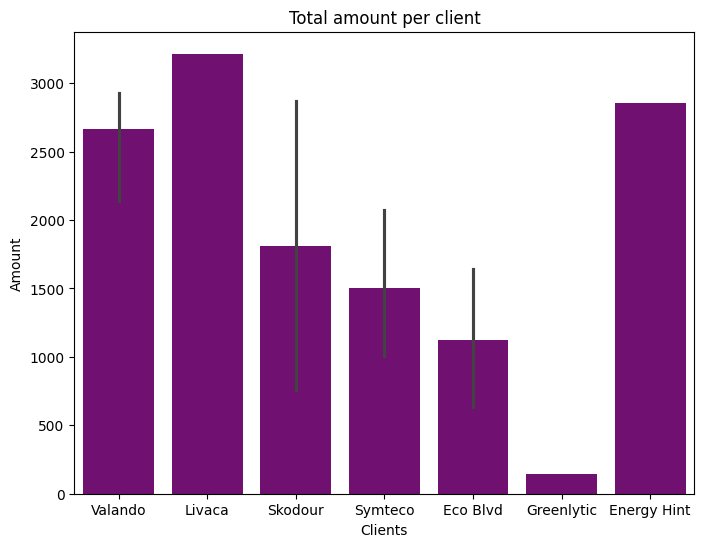

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(x='Client', y='Total', color='purple', data=df_copy1)
plt.xlabel('Clients')
plt.ylabel('Amount')
plt.title('Total amount per client')
plt.show()

In [77]:
count = df_copy1['Paid'].value_counts()
count

Paid
Paid      14
Unpaid     7
Name: count, dtype: int64

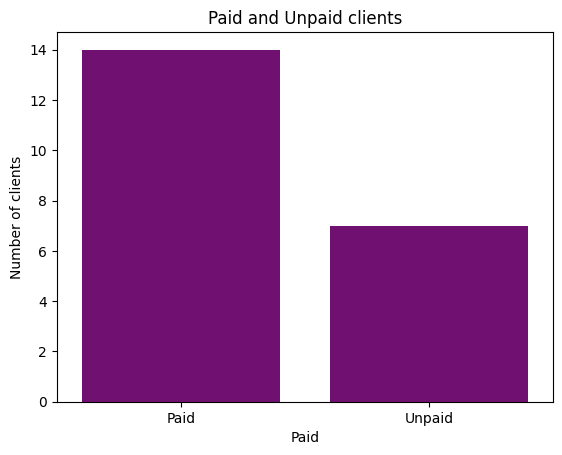

In [ ]:
# Plotting paid clients vs unpaid clients

sns.barplot(x=count.index, y=count.values, color='purple')
plt.ylabel('Number of clients')
plt.title('Paid and Unpaid clients')
plt.show()


From above we se that one third of the clients have not yet paid 

In [85]:
group = df_copy1.groupby('Month')['Total'].sum()
group

Month
1     10150.73
2      8907.65
3      2457.60
4      3211.43
5      3150.53
7      1285.12
8       788.48
10     4492.12
11     2446.25
Name: Total, dtype: float64

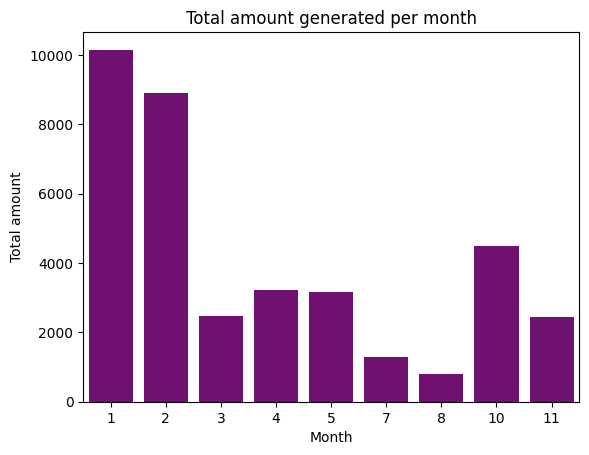

In [83]:
# Total amount for each month
group = df_copy1.groupby('Month')['Total'].sum()

sns.barplot(x=group.index, y=group.values, color='purple')
plt.ylabel('Total amount')
plt.title('Total amount generated per month')
plt.show()

January seem to be the month with most purchases, amounting to £10150.73, followed by February with an amount of £8907.65, while August seem to be less successfull with just £788.48

In [86]:
df_copy1.head(5)

,Client,Estimate,Total,Paid,Day,Month,Year
0,Valando,2252.0,2139.40,Paid,1,1,2014
1,Livaca,2512.0,3215.36,Paid,2,1,2014
2,Skodour,2551.0,3290.79,Paid,6,1,2014
3,Symteco,905.0,868.80,Paid,15,1,2014
4,Eco Blvd,677.0,636.38,Paid,28,1,2014


In [87]:
group1 = df_copy1.groupby(['Paid', 'Month'])['Total'].sum()
group1


Paid    Month
Paid    1        10150.73
        2         8907.65
        4         3211.43
        7          468.12
        10        1640.20
Unpaid  3         2457.60
        5         3150.53
        7          817.00
        8          788.48
        10        2851.92
        11        2446.25
Name: Total, dtype: float64

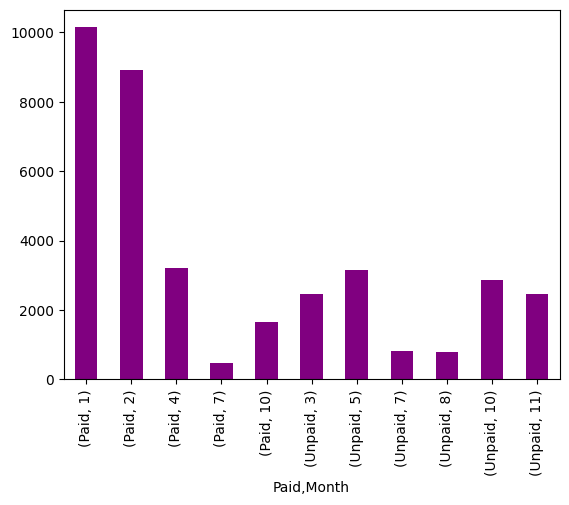

In [88]:
group1.plot(kind='bar', color='purple')
# plt.title('Average Revenue per Customer by Sales Method over Time')
# plt.xlabel('Sales Method')
# plt.ylabel('Revenue per Customer')

plt.show()

clients that made purchases in January, February and April paid for thier purchases while some clients who made purchases in July and October paid but the rest of the customers have unpaid purchases with May being the highest with an amount of £3150.53